In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

# PART - A

Question 1
------------------

In [2]:
# 1.A.

df = pd.read_csv('Part1-Normal.csv')
df1 = pd.read_csv('Part1 - Type_H.csv')
df2 = pd.read_csv('Part1 - Type_S.csv')

In [3]:
#1.B.
df.head()

P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree   Class
0    38.505273  16.964297  35.112814  21.540976  127.632875  7.986683  Normal
1    54.920858  18.968430  51.601455  35.952428  125.846646  2.001642  Normal
2    44.362490   8.945435  46.902096  35.417055  129.220682  4.994195  Normal
3    48.318931  17.452121  48.000000  30.866809  128.980308 -0.910941  Normal
4    45.701789  10.659859  42.577846  35.041929  130.178314 -3.388910  Normal

In [4]:
df.shape

(100, 7)

In [5]:
df1.head()

P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree   Class
0    63.027817  22.552586  39.609117  40.475232   98.672917  -0.254400  Type_H
1    39.056951  10.060991  25.015378  28.995960  114.405425   4.564259  Type_H
2    68.832021  22.218482  50.092194  46.613539  105.985135  -3.530317  Type_H
3    69.297008  24.652878  44.311238  44.644130  101.868495  11.211523  Type_H
4    49.712859   9.652075  28.317406  40.060784  108.168725   7.918501  Type_H

In [6]:
df1.shape

(60, 7)

In [7]:
df2.head()

P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree   Class
0    74.377678  32.053104  78.772013  42.324573  143.560690  56.125906  Type_S
1    89.680567  32.704435  83.130732  56.976132  129.955476  92.027277  Type_S
2    44.529051   9.433234  52.000000  35.095817  134.711772  29.106575  Type_S
3    77.690577  21.380645  64.429442  56.309932  114.818751  26.931841  Type_S
4    76.147212  21.936186  82.961502  54.211027  123.932010  10.431972  Type_S

In [8]:
df2.shape

(150, 7)

In [9]:
# 1.D.

df.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [10]:
df1.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [11]:
df2.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [12]:
# 1.E.

df.Class.unique()

array(['Normal', 'Nrmal'], dtype=object)

In [13]:
df1.Class.unique()

array(['Type_H', 'type_h'], dtype=object)

In [14]:
df2.Class.unique()

array(['Type_S', 'tp_s'], dtype=object)

Question 2
----------------

In [15]:
# 2.A.

# Unifying the Categories in Class Column of each Dataframe
df['Class'] = df['Class'].replace(['Nrmal'],'Normal')
df.Class.unique()

array(['Normal'], dtype=object)

In [16]:
df1['Class'] = df1['Class'].replace(['type_h'],'Type_H')
df1.Class.unique()

array(['Type_H'], dtype=object)

In [17]:
df2['Class'] = df2['Class'].replace(['tp_s'],'Type_S')
df2.Class.unique()

array(['Type_S'], dtype=object)

In [18]:
# 2.B.

#Stacking all Dataframes df,df1,df2 on top on one another to form one dataframe df3
df3 = pd.concat([df,df1,df2],axis=0,sort=False)
df3.shape

(310, 7)

In [19]:
#Resetting the Index of new dataframe df3
df3.reset_index(drop=True, inplace=True)
df3

P_incidence     P_tilt    L_angle    S_slope    P_radius    S_Degree  \
0      38.505273  16.964297  35.112814  21.540976  127.632875    7.986683   
1      54.920858  18.968430  51.601455  35.952428  125.846646    2.001642   
2      44.362490   8.945435  46.902096  35.417055  129.220682    4.994195   
3      48.318931  17.452121  48.000000  30.866809  128.980308   -0.910941   
4      45.701789  10.659859  42.577846  35.041929  130.178314   -3.388910   
..           ...        ...        ...        ...         ...         ...   
305    80.111572  33.942432  85.101608  46.169139  125.593624  100.292107   
306    95.480229  46.550053  59.000000  48.930176   96.683903   77.283072   
307    74.094731  18.823727  76.032156  55.271004  128.405731   73.388216   
308    87.679087  20.365613  93.822416  67.313473  120.944829   76.730629   
309    48.259920  16.417462  36.329137  31.842457   94.882336   28.343799   

      Class  
0    Normal  
1    Normal  
2    Normal  
3    Normal  
4    Normal  
..      ...  
305  Type_S  
306  Type_S  
307  Type_S  
308  Type_S  
309  Type_S  

[310 rows x 7 columns]

In [20]:
df3.Class.unique()

array(['Normal', 'Type_H', 'Type_S'], dtype=object)

In [21]:
# 2.C.

for x in range(5):
 df4=df3.sample(frac = 0.5)
 print(df4.to_string())
 print('\n')

     P_incidence     P_tilt    L_angle    S_slope    P_radius    S_Degree   Class
238    72.054034  24.700737  79.874016  47.353297  107.172358   56.426159  Type_S
137    35.703458  19.443253  20.700000  16.260205  137.540613   -0.263490  Type_H
292    74.469082  33.283157  66.942101  41.185925  146.466001  124.984406  Type_S
216    70.484104  12.489488  62.417142  57.994617  114.190049   56.902448  Type_S
25     63.929470  19.971097  40.177050  43.958373  113.065939  -11.058179  Normal
226    70.676898  21.704402  59.181161  48.972496  103.008354   27.810148  Type_S
290    43.718262   9.811985  52.000000  33.906277   88.434242   40.880923  Type_S
6      50.913101   6.677000  30.896522  44.236102  118.151531   -1.057986  Normal
30     41.646916   8.835549  36.031975  32.811367  116.555168   -6.054538  Normal
198    77.655119  22.432950  93.892779  55.222169  123.055707   61.211187  Type_S
31     51.529358  13.517847  35.000000  38.011510  126.718516   13.928331  Normal
136    32.090987

In [22]:
# 2.D.

(df3.isnull().sum()/len(df))

P_incidence    0.0
P_tilt         0.0
L_angle        0.0
S_slope        0.0
P_radius       0.0
S_Degree       0.0
Class          0.0
dtype: float64

In [23]:
print(df3.to_string())

     P_incidence     P_tilt     L_angle     S_slope    P_radius    S_Degree   Class
0      38.505273  16.964297   35.112814   21.540976  127.632875    7.986683  Normal
1      54.920858  18.968430   51.601455   35.952428  125.846646    2.001642  Normal
2      44.362490   8.945435   46.902096   35.417055  129.220682    4.994195  Normal
3      48.318931  17.452121   48.000000   30.866809  128.980308   -0.910941  Normal
4      45.701789  10.659859   42.577846   35.041929  130.178314   -3.388910  Normal
5      30.741938  13.354966   35.903526   17.386972  142.410107   -2.005373  Normal
6      50.913101   6.677000   30.896522   44.236102  118.151531   -1.057986  Normal
7      38.126589   6.557617   50.445075   31.568971  132.114805    6.338199  Normal
8      51.624672  15.969344   35.000000   35.655328  129.385308    1.009228  Normal
9      64.311867  26.328369   50.958964   37.983498  106.177751    3.118221  Normal
10     44.489275  21.786433   31.474154   22.702842  113.778494   -0.284129 

In [24]:
# 2.E.

df3.describe()

P_incidence      P_tilt     L_angle     S_slope    P_radius    S_Degree
count   310.000000  310.000000  310.000000  310.000000  310.000000  310.000000
mean     60.496653   17.542822   51.930930   42.953831  117.920655   26.296694
std      17.236520   10.008330   18.554064   13.423102   13.317377   37.559027
min      26.147921   -6.554948   14.000000   13.366931   70.082575  -11.058179
25%      46.430294   10.667069   37.000000   33.347122  110.709196    1.603727
50%      58.691038   16.357689   49.562398   42.404912  118.268178   11.767934
75%      72.877696   22.120395   63.000000   52.695888  125.467674   41.287352
max     129.834041   49.431864  125.742385  121.429566  163.071041  418.543082

Question 3
--------------

In [25]:
# 3.A.

df3.corr()

P_incidence    P_tilt   L_angle   S_slope  P_radius  S_Degree
P_incidence     1.000000  0.629199  0.717282  0.814960 -0.247467  0.638743
P_tilt          0.629199  1.000000  0.432764  0.062345  0.032668  0.397862
L_angle         0.717282  0.432764  1.000000  0.598387 -0.080344  0.533667
S_slope         0.814960  0.062345  0.598387  1.000000 -0.342128  0.523557
P_radius       -0.247467  0.032668 -0.080344 -0.342128  1.000000 -0.026065
S_Degree        0.638743  0.397862  0.533667  0.523557 -0.026065  1.000000

<AxesSubplot:>

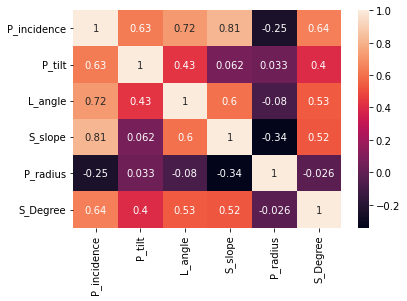

In [26]:
sns.heatmap(df3.corr(),annot=True)

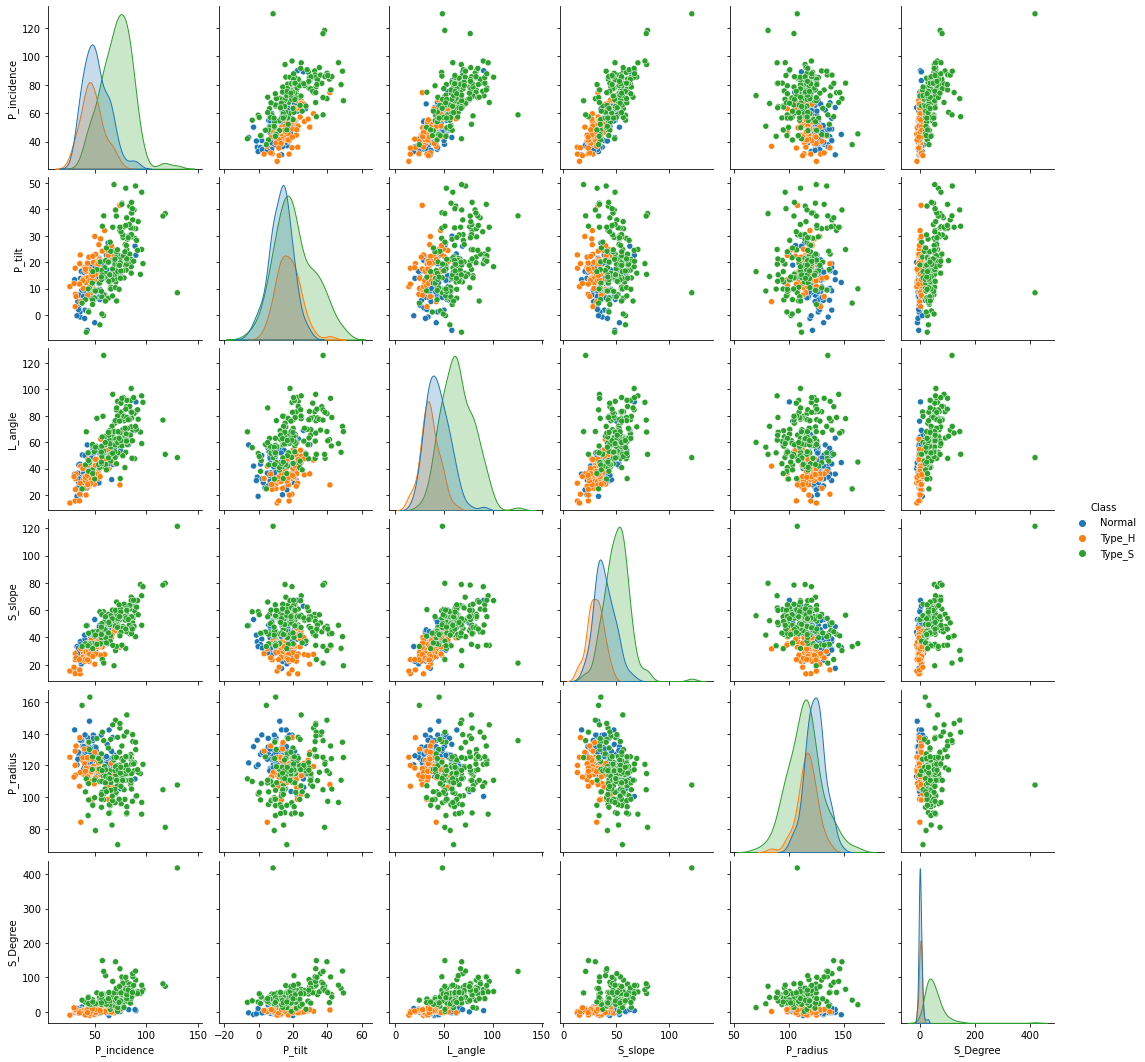

In [27]:
# 3.C.

sns.pairplot(df3,hue='Class',kind='scatter')

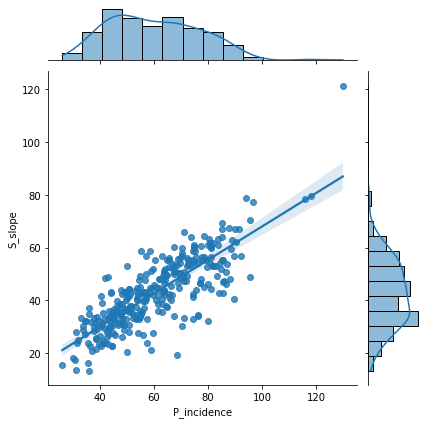

In [28]:
# 3.D. 

sns.jointplot(x = "P_incidence", y = "S_slope",
              kind = "reg", data = df3)

(-10.0, 175.0)

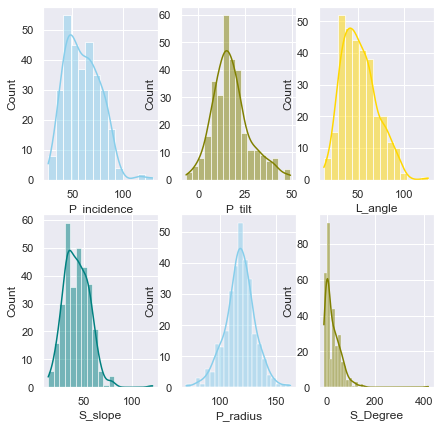

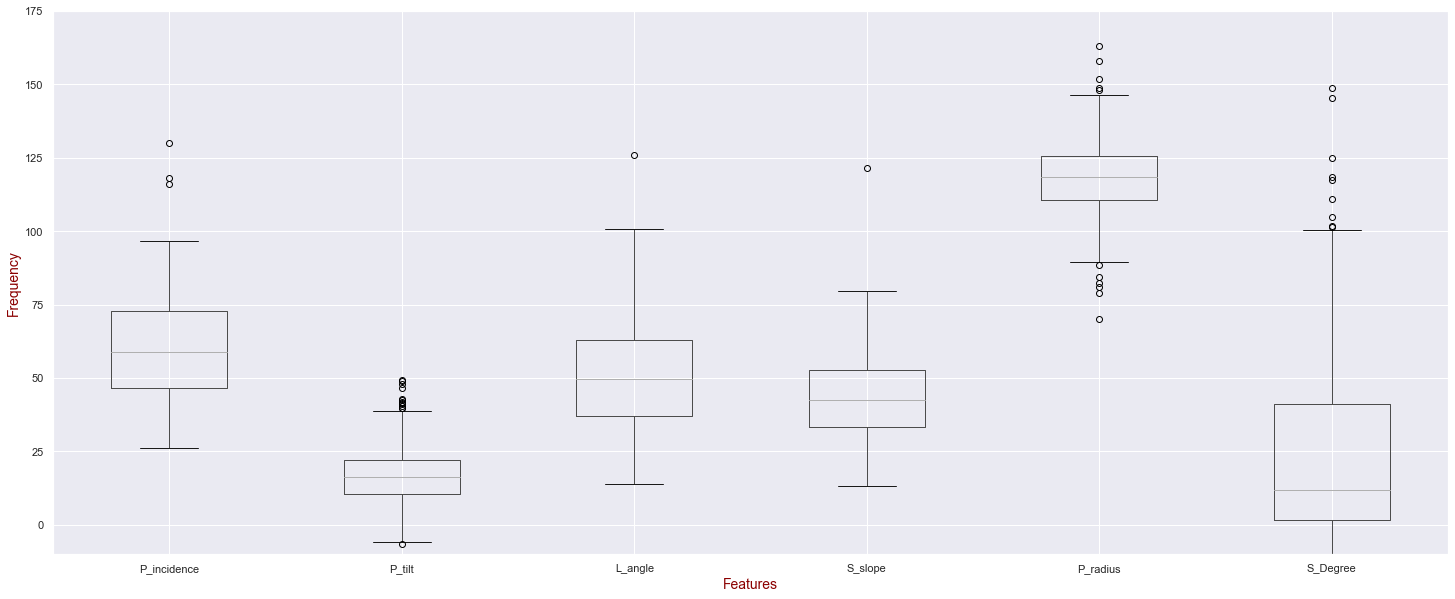

In [29]:
# 3.E.

# KDE plots for all columns except categorical variable 'Class'

sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 3, figsize=(7, 7))

sns.histplot(data=df3, x="P_incidence", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df3, x="P_tilt", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df3, x="L_angle", kde=True, color="gold", ax=axs[0, 2])
sns.histplot(data=df3, x="S_slope", kde=True, color="teal", ax=axs[1, 0])
sns.histplot(data=df3, x="P_radius", kde=True, color="skyblue", ax=axs[1, 1])
sns.histplot(data=df3, x="S_Degree", kde=True, color="olive", ax=axs[1, 2])


# Box plots for all columns except categorical variable 'Class'

plt.figure(figsize=(25,10))
df3.boxplot()

font = {'family': 'Arial',
        'color':  'darkred',
        'weight': 'normal',
        'size': 14,
        }
plt.xlabel('Features', fontdict = font)
plt.ylabel('Frequency',fontdict = font)

plt.ylim( [ -10, 175 ] )         # For limiting the Y-axis scale : from y= -10 to y=175.

# Box plots for Categorical 'Class' Variable

QUESTION 4
-------------------

In [30]:
# 3.A.

# Building KNN model

# independant variables split into X
X = df3.drop(['Class'], axis=1)

# the dependent variable split into X
Y = df3[['Class']]

X.head()

P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree
0    38.505273  16.964297  35.112814  21.540976  127.632875  7.986683
1    54.920858  18.968430  51.601455  35.952428  125.846646  2.001642
2    44.362490   8.945435  46.902096  35.417055  129.220682  4.994195
3    48.318931  17.452121  48.000000  30.866809  128.980308 -0.910941
4    45.701789  10.659859  42.577846  35.041929  130.178314 -3.388910

In [31]:
Y.head()

Class
0  Normal
1  Normal
2  Normal
3  Normal
4  Normal

In [32]:
# convert all attribute values to fit into a Z scale 

XScaled  = X.apply(zscore)

XScaled.describe()

P_incidence        P_tilt       L_angle       S_slope      P_radius  \
count  3.100000e+02  3.100000e+02  3.100000e+02  3.100000e+02  3.100000e+02   
mean   1.042177e-16  2.096889e-16  1.980495e-16  2.829278e-17 -5.071212e-16   
std    1.001617e+00  1.001617e+00  1.001617e+00  1.001617e+00  1.001617e+00   
min   -1.996010e+00 -2.411664e+00 -2.047652e+00 -2.207741e+00 -3.597963e+00   
25%   -8.173982e-01 -6.881138e-01 -8.060267e-01 -7.168418e-01 -5.423830e-01   
50%   -1.049246e-01 -1.186061e-01 -1.278621e-01 -4.095971e-02  2.613767e-02   
75%    7.194643e-01  4.581158e-01  5.975493e-01  7.269414e-01  5.676209e-01   
max    4.029206e+00  3.191402e+00  3.984615e+00  5.855771e+00  3.395818e+00   

           S_Degree  
count  3.100000e+02  
mean  -1.277204e-16  
std    1.001617e+00  
min   -9.961725e-01  
25%   -6.585073e-01  
50%   -3.874502e-01  
75%    3.997679e-01  
max    1.046035e+01

In [33]:
# 3.B.

# Split X and y into training and test set in 80:20 ratio

X_train, X_test, Y_train, Y_test = train_test_split(XScaled, Y, test_size=0.20, random_state=42) 


In [34]:
# 3.C.

# KNN Base model

NNH = KNeighborsClassifier()

# Applying the classifier on Training data to learn from it
NNH.fit(X_train, Y_train)

# Predicting the target of Testing data 
Y_predict_test = NNH.predict(X_test)

#Checking the mean accuracy for Testing data
NNH.score(X_test, Y_test)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.8387096774193549

Confusion Matrix For Training data
[[ 63  11   4]
 [ 14  35   1]
 [  8   2 110]]


<AxesSubplot:>

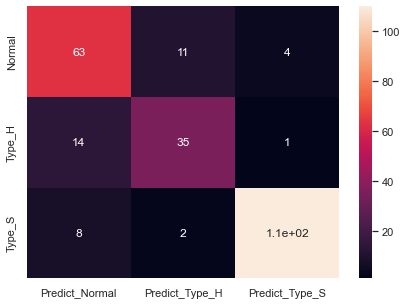

In [35]:
# 3.D.

# Confusion Matrix for Training Data

from sklearn import metrics
print("Confusion Matrix For Training data")

Y_predict_train = NNH.predict(X_train)
cm1 = metrics.confusion_matrix(Y_train, Y_predict_train, labels=["Normal", "Type_H", "Type_S"])

print(cm1)

df3_cm1 = pd.DataFrame(cm1, index = [i for i in ["Normal", "Type_H", "Type_S"]],
                  columns = [i for i in ["Predict_Normal", "Predict_Type_H", "Predict_Type_S"]])
plt.figure(figsize = (7,5))
sns.heatmap(df3_cm1, annot=True)


Confusion Matrix For Testing Data
[[19  2  1]
 [ 2  7  1]
 [ 3  1 26]]


<AxesSubplot:>

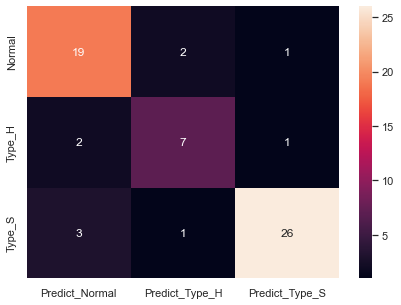

In [36]:
# Confusion Matrix for Testing Data

from sklearn import metrics

print("Confusion Matrix For Testing Data")
cm=metrics.confusion_matrix(Y_test, Y_predict_test, labels=["Normal", "Type_H", "Type_S"])

print(cm)

df3_cm = pd.DataFrame(cm, index = [i for i in ["Normal", "Type_H", "Type_S"]],
                  columns = [i for i in ["Predict_Normal", "Predict_Type_H", "Predict_Type_S"]])
plt.figure(figsize = (7,5))
sns.heatmap(df3_cm, annot=True)

In [37]:
# Calculate Performance Metrics For Training data

from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(Y_train, Y_predict_train)

0.808119658119658

In [38]:
from sklearn.metrics import classification_report
print(classification_report(Y_train,Y_predict_train))

              precision    recall  f1-score   support

      Normal       0.74      0.81      0.77        78
      Type_H       0.73      0.70      0.71        50
      Type_S       0.96      0.92      0.94       120

    accuracy                           0.84       248
   macro avg       0.81      0.81      0.81       248
weighted avg       0.84      0.84      0.84       248



In [39]:
# Calculate Performance Metrics For Testing data

balanced_accuracy_score(Y_test, Y_predict_test)

0.8101010101010101

In [40]:
print(classification_report(Y_test,Y_predict_test))

              precision    recall  f1-score   support

      Normal       0.79      0.86      0.83        22
      Type_H       0.70      0.70      0.70        10
      Type_S       0.93      0.87      0.90        30

    accuracy                           0.84        62
   macro avg       0.81      0.81      0.81        62
weighted avg       0.84      0.84      0.84        62



In [41]:
# 5.A.

# Finding the best k value without any other parameter set for KNN classifier.

from sklearn import metrics

training_accuracy_score = []
testing_accuracy_score = []
neighbors = range(1,31)

for number_of_neighbors in neighbors :
    NNH = KNeighborsClassifier(n_neighbors = number_of_neighbors)
    NNH.fit(X_train, Y_train)
    training_accuracy_score.append(NNH.score(X_train, Y_train))
    testing_accuracy_score.append(NNH.score(X_test, Y_test))


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

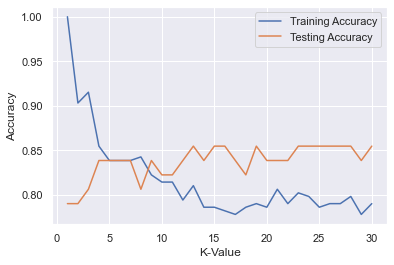

In [42]:
# Plotting the accuracy levels for training and testing data with each k value between 1 and 31

plt.plot(neighbors,training_accuracy_score, label ="Training Accuracy")
plt.plot(neighbors,testing_accuracy_score, label = "Testing Accuracy")
plt.xlabel("K-Value")
plt.ylabel("Accuracy")
plt.legend()

In [43]:
# Test data accuracy for K = 5

NNH_best = KNeighborsClassifier(n_neighbors = 5)

# Applying the classifier on Training data to learn from it
NNH_best.fit(X_train, Y_train)

# Predicting the target of Testing data 
Y_predict_test = NNH_best.predict(X_test)

#Checking the mean accuracy for Testing data
NNH_best.score(X_test, Y_test)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.8387096774193549

In [44]:
# Finding the best k value with the weight parameter for KNN classifier set to calculate weighted distance for labelling each new data point

training_accuracy = []
testing_accuracy = []
neighbors = range(1,31)

for number_of_neighbors in neighbors :
    NNH_best_k = KNeighborsClassifier(n_neighbors= number_of_neighbors, weights = 'distance')
    NNH_best_k.fit(X_train, Y_train)
    training_accuracy.append(NNH_best_k.score(X_train, Y_train))
    testing_accuracy.append(NNH_best_k.score(X_test, Y_test))

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

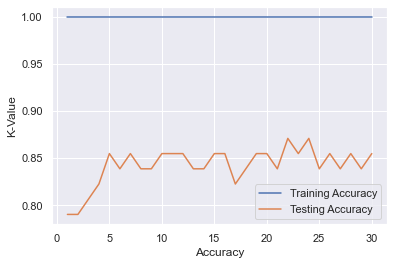

In [45]:
# Plotting the accuracy levels for training and testing data with each k value between 1 and 31

plt.plot(neighbors,training_accuracy, label ="Training Accuracy")
plt.plot(neighbors,testing_accuracy, label = "Testing Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("K-Value")
plt.legend()

In [46]:
# Accuracy of the new improved KNN Classifier model on Testing data with k =22 and weight = 'distance'

NNH_improved = KNeighborsClassifier(n_neighbors=22, weights = 'distance')

# Call Nearest Neighbour algorithm
NNH_improved.fit(X_train, Y_train)
Y_predict_test = NNH_improved.predict(X_test)
NNH_improved.score(X_test, Y_test)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.8709677419354839

In [47]:
# 5.B.

# Calculate Improved Performance Metrics For Training data

Y_predict_train = NNH_improved.predict(X_train)

from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(Y_train, Y_predict_train)

1.0

In [48]:
from sklearn.metrics import classification_report
print(classification_report(Y_train,Y_predict_train))

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        78
      Type_H       1.00      1.00      1.00        50
      Type_S       1.00      1.00      1.00       120

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248



In [49]:
balanced_accuracy_score(Y_test, Y_predict_test)

0.8545454545454545

In [50]:
print(classification_report(Y_test,Y_predict_test))

              precision    recall  f1-score   support

      Normal       0.79      0.86      0.83        22
      Type_H       0.80      0.80      0.80        10
      Type_S       0.96      0.90      0.93        30

    accuracy                           0.87        62
   macro avg       0.85      0.85      0.85        62
weighted avg       0.88      0.87      0.87        62



# PART - B

# Question 1

In [51]:
# 1.A.

df4 = pd.read_csv('Part2 + Data2.csv')
df5 = pd.read_csv('Part2 - Data1.csv')

In [52]:
# 1.B.
df4.shape

(5000, 7)

In [53]:
df5.shape

(5000, 8)

In [54]:
df4.head()

ID  Mortgage  Security  FixedDepositAccount  InternetBanking  CreditCard  \
0   1         0         1                    0                0           0   
1   2         0         1                    0                0           0   
2   3         0         0                    0                0           0   
3   4         0         0                    0                0           0   
4   5         0         0                    0                0           1   

   LoanOnCard  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

In [55]:
df5.head()

ID  Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  \
0   1   25              1            49    91107            4   
1   2   45             19            34    90089            3   
2   3   39             15            11    94720            1   
3   4   35              9           100    94112            1   
4   5   35              8            45    91330            4   

   MonthlyAverageSpend  Level  
0                  1.6      1  
1                  1.5      1  
2                  1.0      1  
3                  2.7      2  
4                  1.0      2

In [56]:
df4.dtypes

ID                       int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

In [57]:
df5.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
dtype: object

In [58]:
# 1.C.

print(df4.to_string())

        ID  Mortgage  Security  FixedDepositAccount  InternetBanking  CreditCard  LoanOnCard
0        1         0         1                    0                0           0         NaN
1        2         0         1                    0                0           0         NaN
2        3         0         0                    0                0           0         NaN
3        4         0         0                    0                0           0         NaN
4        5         0         0                    0                0           1         NaN
5        6       155         0                    0                1           0         NaN
6        7         0         0                    0                1           0         NaN
7        8         0         0                    0                0           1         NaN
8        9       104         0                    0                1           0         NaN
9       10         0         0                    0                0  

In [59]:
print(df5.to_string())

        ID  Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  MonthlyAverageSpend  Level
0        1   25              1            49    91107            4                 1.60      1
1        2   45             19            34    90089            3                 1.50      1
2        3   39             15            11    94720            1                 1.00      1
3        4   35              9           100    94112            1                 2.70      2
4        5   35              8            45    91330            4                 1.00      2
5        6   37             13            29    92121            4                 0.40      2
6        7   53             27            72    91711            2                 1.50      2
7        8   50             24            22    93943            1                 0.30      3
8        9   35             10            81    90089            3                 0.60      2
9       10   34              9           180    93

In [60]:
df6 = pd.merge(df5,df4,how='outer',on='ID')

In [61]:
df6.head()

ID  Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  \
0   1   25              1            49    91107            4   
1   2   45             19            34    90089            3   
2   3   39             15            11    94720            1   
3   4   35              9           100    94112            1   
4   5   35              8            45    91330            4   

   MonthlyAverageSpend  Level  Mortgage  Security  FixedDepositAccount  \
0                  1.6      1         0         1                    0   
1                  1.5      1         0         1                    0   
2                  1.0      1         0         0                    0   
3                  2.7      2         0         0                    0   
4                  1.0      2         0         0                    0   

   InternetBanking  CreditCard  LoanOnCard  
0                0           0         NaN  
1                0           0         NaN  
2                0           0         NaN  
3                0           0         NaN  
4                0           1         NaN

In [62]:
df6.shape

(5000, 14)

In [63]:
# 1.D.

df6.columns

Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level', 'Mortgage', 'Security',
       'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard'],
      dtype='object')

In [64]:
df6[['CreditCard','InternetBanking','FixedDepositAccount','Security','Level','HiddenScore']] = df6[['CreditCard','InternetBanking','FixedDepositAccount','Security','Level','HiddenScore']].astype(object)

In [65]:
df6.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore             object
MonthlyAverageSpend    float64
Level                   object
Mortgage                 int64
Security                object
FixedDepositAccount     object
InternetBanking         object
CreditCard              object
LoanOnCard             float64
dtype: object

# Question 2

In [66]:
# 2.A.

print(df6.to_string())

        ID  Age  CustomerSince  HighestSpend  ZipCode HiddenScore  MonthlyAverageSpend Level  Mortgage Security FixedDepositAccount InternetBanking CreditCard  LoanOnCard
0        1   25              1            49    91107           4                 1.60     1         0        1                   0               0          0         NaN
1        2   45             19            34    90089           3                 1.50     1         0        1                   0               0          0         NaN
2        3   39             15            11    94720           1                 1.00     1         0        0                   0               0          0         NaN
3        4   35              9           100    94112           1                 2.70     2         0        0                   0               0          0         NaN
4        5   35              8            45    91330           4                 1.00     2         0        0                   0              

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanOnCard', ylabel='count'>

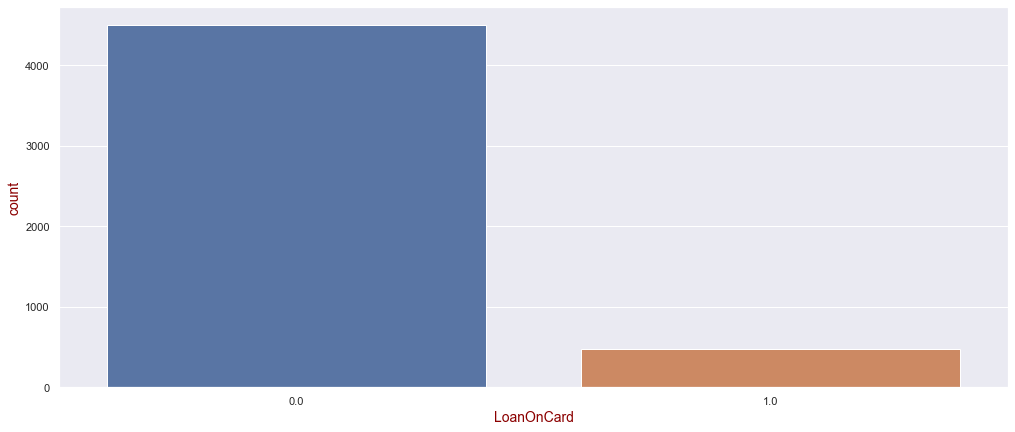

In [67]:
# Distribution of LoanOnCard column through a Count Plot

sns.set(style="darkgrid")
plt.figure(figsize=(17,7))

font = {'family': 'Arial',
        'color':  'darkred',
        'weight': 'normal',
        'size': 14,
        }

plt.xlabel('LoanOnCard', fontdict = font)
plt.ylabel('Frequency',fontdict = font)
sns.countplot(df6['LoanOnCard'])


In [68]:
(df6['LoanOnCard'].value_counts()/df6['LoanOnCard'].count())*100

0.0    90.361446
1.0     9.638554
Name: LoanOnCard, dtype: float64

In [70]:
# 2.B.

# Finding the unique values to impute if required
df6['LoanOnCard'].unique()

array([nan,  1.,  0.])

In [71]:
# Finding number of total Null/NaN values to be imputed
df6['LoanOnCard'].isna().sum()

20

In [72]:
# Percentage of Null Values in the LoanOnCard Column
print ('Percentage of Null values in the LoanOnCard column is = ',(df6['LoanOnCard'].isna().sum()/df6['LoanOnCard'].count())*100)

Percentage of Null values in the LoanOnCard column is =  0.4016064257028112


In [73]:
# Finding the Mode value in the 'LoanOnCard' column to perform an imputaion for the Null values
df6['LoanOnCard'].value_counts()

0.0    4500
1.0     480
Name: LoanOnCard, dtype: int64

In [74]:
# Replacing all Null values in LoanOnCard with the Mode value - 0
df6['LoanOnCard']=df6['LoanOnCard'].fillna(0)

In [75]:
print(df6.to_string())

        ID  Age  CustomerSince  HighestSpend  ZipCode HiddenScore  MonthlyAverageSpend Level  Mortgage Security FixedDepositAccount InternetBanking CreditCard  LoanOnCard
0        1   25              1            49    91107           4                 1.60     1         0        1                   0               0          0         0.0
1        2   45             19            34    90089           3                 1.50     1         0        1                   0               0          0         0.0
2        3   39             15            11    94720           1                 1.00     1         0        0                   0               0          0         0.0
3        4   35              9           100    94112           1                 2.70     2         0        0                   0               0          0         0.0
4        5   35              8            45    91330           4                 1.00     2         0        0                   0              

In [76]:
# Converting the Column type to int64
df6[['LoanOnCard']] = df6[['LoanOnCard']].astype('int64')
df6.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore             object
MonthlyAverageSpend    float64
Level                   object
Mortgage                 int64
Security                object
FixedDepositAccount     object
InternetBanking         object
CreditCard              object
LoanOnCard               int64
dtype: object

In [77]:
print(df6.to_string())

        ID  Age  CustomerSince  HighestSpend  ZipCode HiddenScore  MonthlyAverageSpend Level  Mortgage Security FixedDepositAccount InternetBanking CreditCard  LoanOnCard
0        1   25              1            49    91107           4                 1.60     1         0        1                   0               0          0           0
1        2   45             19            34    90089           3                 1.50     1         0        1                   0               0          0           0
2        3   39             15            11    94720           1                 1.00     1         0        0                   0               0          0           0
3        4   35              9           100    94112           1                 2.70     2         0        0                   0               0          0           0
4        5   35              8            45    91330           4                 1.00     2         0        0                   0              

In [78]:
# 2.C.

# Checking for unexpected values in all categorical variables
for column in df6[['CreditCard', 'InternetBanking', 'FixedDepositAccount', 'Security', 'Level', 'HiddenScore']]:
    print(df6[column].unique())

[0 1]
[0 1]
[0 1]
[1 0]
[1 2 3]
[4 3 1 2]


# Question 3

In [79]:
# 3.A.

# Removing columns not required for predication
df7 = df6.drop(['ID','ZipCode'], axis = 1)

In [80]:

# independant variables split into X
X = df7.drop(['LoanOnCard'], axis=1)

# the dependent variable split into X
Y = df7[['LoanOnCard']]

X.head()

Age  CustomerSince  HighestSpend HiddenScore  MonthlyAverageSpend Level  \
0   25              1            49           4                  1.6     1   
1   45             19            34           3                  1.5     1   
2   39             15            11           1                  1.0     1   
3   35              9           100           1                  2.7     2   
4   35              8            45           4                  1.0     2   

   Mortgage Security FixedDepositAccount InternetBanking CreditCard  
0         0        1                   0               0          0  
1         0        1                   0               0          0  
2         0        0                   0               0          0  
3         0        0                   0               0          0  
4         0        0                   0               0          1

In [81]:
df7.dtypes

Age                      int64
CustomerSince            int64
HighestSpend             int64
HiddenScore             object
MonthlyAverageSpend    float64
Level                   object
Mortgage                 int64
Security                object
FixedDepositAccount     object
InternetBanking         object
CreditCard              object
LoanOnCard               int64
dtype: object

In [82]:
df7

Age  CustomerSince  HighestSpend HiddenScore  MonthlyAverageSpend Level  \
0      25              1            49           4                  1.6     1   
1      45             19            34           3                  1.5     1   
2      39             15            11           1                  1.0     1   
3      35              9           100           1                  2.7     2   
4      35              8            45           4                  1.0     2   
...   ...            ...           ...         ...                  ...   ...   
4995   29              3            40           1                  1.9     3   
4996   30              4            15           4                  0.4     1   
4997   63             39            24           2                  0.3     3   
4998   65             40            49           3                  0.5     2   
4999   28              4            83           3                  0.8     1   

      Mortgage Security FixedDepositAccount InternetBanking CreditCard  \
0            0        1                   0               0          0   
1            0        1                   0               0          0   
2            0        0                   0               0          0   
3            0        0                   0               0          0   
4            0        0                   0               0          1   
...        ...      ...                 ...             ...        ...   
4995         0        0                   0               1          0   
4996        85        0                   0               1          0   
4997         0        0                   0               0          0   
4998         0        0                   0               1          0   
4999         0        0                   0               1          1   

      LoanOnCard  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
4995           0  
4996           0  
4997           0  
4998           0  
4999           0  

[5000 rows x 12 columns]

In [83]:
# 3.B.

# Split X and Y into training and test set in 75:25 ratio

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42) 

In [84]:
# 3.C.

# Logistic Regression Base Model

from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model_base = LogisticRegression()
model_base.fit(X_train, Y_train)
#predict on test
Y_predict = model_base.predict(X_test)

# Model coefficients
coef_df7 = pd.DataFrame(model_base.coef_)
coef_df7['intercept'] = model_base.intercept_
coef_df7

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0         1        2         3        4         5         6  \
0 -0.45153  0.466014  0.04708  0.531999  0.04981  1.452237  0.000669   

          7         8         9        10  intercept  
0  0.107584  2.351037 -0.414526 -0.686494  -0.353288

In [85]:
model_score = model_base.score(X_test, Y_test)
print("Accuracy of Logistic Regression Base Model without a Balanced Dataset/Hyperparameter Tuning =", model_score)

Accuracy of Logistic Regression Base Model without a Balanced Dataset/Hyperparameter Tuning = 0.948


<AxesSubplot:>

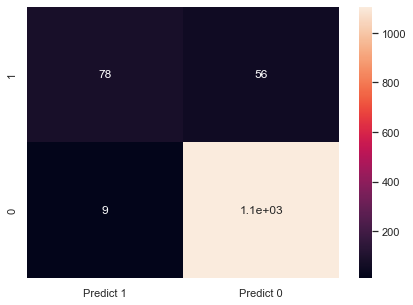

In [86]:
# 3.D.

# Confusion Matrix for Testing Data Predictions

cm=metrics.confusion_matrix(Y_test, Y_predict, labels=[1, 0])

df7_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df7_cm, annot=True)

In [87]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1116
           1       0.90      0.58      0.71       134

    accuracy                           0.95      1250
   macro avg       0.92      0.79      0.84      1250
weighted avg       0.95      0.95      0.94      1250



In [88]:
# 3.E.

df6['LoanOnCard'].value_counts()

0    4520
1     480
Name: LoanOnCard, dtype: int64

In [89]:
# Balancing between the target variable classes

from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df7_majority = df7[(df7['LoanOnCard']==0)] 
df7_minority = df7[(df7['LoanOnCard']==1)] 
# upsample minority class
df7_minority_upsampled = resample(df7_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 4520 , # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df7_upsampled = pd.concat([df7_majority,df7_minority_upsampled])

In [90]:
print(df7_upsampled.to_string())

      Age  CustomerSince  HighestSpend HiddenScore  MonthlyAverageSpend Level  Mortgage Security FixedDepositAccount InternetBanking CreditCard  LoanOnCard
0      25              1            49           4                 1.60     1         0        1                   0               0          0           0
1      45             19            34           3                 1.50     1         0        1                   0               0          0           0
2      39             15            11           1                 1.00     1         0        0                   0               0          0           0
3      35              9           100           1                 2.70     2         0        0                   0               0          0           0
4      35              8            45           4                 1.00     2         0        0                   0               0          1           0
5      37             13            29           4              

In [91]:
df7_upsampled['LoanOnCard'].value_counts() 

0    4520
1    4520
Name: LoanOnCard, dtype: int64

In [92]:

# independant variables split into X_unsampled
X_upsampled = df7_upsampled.drop(['LoanOnCard'], axis=1)

# the dependent variable split into Y_unsampled
Y_upsampled = df7_upsampled[['LoanOnCard']]

X_upsampled.head()

Age  CustomerSince  HighestSpend HiddenScore  MonthlyAverageSpend Level  \
0   25              1            49           4                  1.6     1   
1   45             19            34           3                  1.5     1   
2   39             15            11           1                  1.0     1   
3   35              9           100           1                  2.7     2   
4   35              8            45           4                  1.0     2   

   Mortgage Security FixedDepositAccount InternetBanking CreditCard  
0         0        1                   0               0          0  
1         0        1                   0               0          0  
2         0        0                   0               0          0  
3         0        0                   0               0          0  
4         0        0                   0               0          1

In [93]:

# Split X and Y into training and test set in 75:25 ratio

X_upsampled_train, X_upsampled_test, Y_upsampled_train, Y_upsampled_test = train_test_split(X_upsampled, Y_upsampled, test_size=0.25, random_state=42)

In [94]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model_base_balanced = LogisticRegression() # solver="liblinear"
model_base_balanced.fit(X_upsampled_train, Y_upsampled_train)
#predict on test
Y_upsampled_predict = model_base_balanced.predict(X_upsampled_test)

# Model coefficients
coef_df7_upsampled = pd.DataFrame(model_base_balanced.coef_)
coef_df7_upsampled['intercept'] = model_base_balanced.intercept_
coef_df7_upsampled

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0         1         2         3         4         5         6  \
0 -0.430765  0.431351  0.055096  0.609102  0.267741  1.505771 -0.000006   

          7         8         9        10  intercept  
0  0.091654  2.554323 -0.308738 -0.424044  -0.325162

In [95]:
model_score = model_base_balanced.score(X_upsampled_test, Y_upsampled_test)
print("Accuracy of Logistic Regression Base Model with balanced dataset but without Hyperparameter Tuning =", model_score)

Accuracy of Logistic Regression Base Model with balanced dataset but without Hyperparameter Tuning = 0.8907079646017699


<AxesSubplot:>

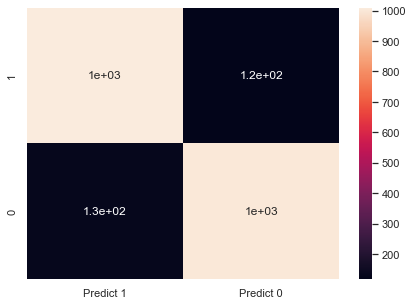

In [96]:
# Confusion Matrix for Upsampled Testing Data Predictions

upsampled_cm=metrics.confusion_matrix(Y_upsampled_test, Y_upsampled_predict, labels=[1, 0])

df7_upsampled_cm = pd.DataFrame(upsampled_cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df7_upsampled_cm, annot=True)

In [97]:
from sklearn.metrics import classification_report
print(classification_report(Y_upsampled_test,Y_upsampled_predict))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1133
           1       0.89      0.90      0.89      1127

    accuracy                           0.89      2260
   macro avg       0.89      0.89      0.89      2260
weighted avg       0.89      0.89      0.89      2260



# Question 4

In [101]:
# 4.A.

# convert all attribute values to fit into a Z scale

from sklearn.preprocessing import scale
XScaled = scale(X)

In [102]:
# Split X and Y into training and test set in 75:25 ratio

Xs_train, Xs_test, Y_train, Y_test = train_test_split(XScaled, Y, test_size=0.25, random_state=42)

In [103]:
# KNN Base Model

NNH_base = KNeighborsClassifier()

# Call Nearest Neighbour algorithm
NNH_base.fit(Xs_train, Y_train)
Y_predict_test = NNH_base.predict(Xs_test)
print("Accuracy of KNN Base Model without Hyperparameter Tuning =", NNH_base.score(Xs_test, Y_test))

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy of KNN Base Model without Hyperparameter Tuning = 0.956


In [104]:
# SVM Base Model

from sklearn.svm import SVC
svc_base = SVC()
svc_base.fit(Xs_train, Y_train)

Y_predict_test = svc_base.predict(Xs_test)
print("Accuracy of SVM Base Model without Hyperparameter Tuning =", svc_base.score(Xs_test, Y_test))

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy of SVM Base Model without Hyperparameter Tuning = 0.9744


In [105]:
# 4.B.

# Hyperparameter Tuning for KNN Model

from sklearn.model_selection import GridSearchCV

neighbors = range(1,31)
grid_params = { 'n_neighbors' : neighbors,
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [106]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [107]:
# fit the Grid Search model for KNN model on our train set
g_res = gs.fit(Xs_train, Y_train)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [108]:
# find the best score for our KNN model after Hyperparameter tuning
print("Best cross-validated mean accuracy of KNN model with Hyperparameter Tuning done = ", g_res.best_score_)

Best cross-validated mean accuracy of KNN model with Hyperparameter Tuning done =  0.9573333333333333


In [109]:
# get the hyperparameters with the above best score
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}

In [110]:
# Testing out Hyperparameter tuned KNN model on the Test Data

print("Accuracy for the Test Data with Hyperparameter Tuned KNN Model =", g_res.score(Xs_test, Y_test))

Accuracy for the Test Data with Hyperparameter Tuned KNN Model = 0.9608


In [111]:
# Hyperparameter Tuning for SVM Model

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear','rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
best_grid = grid.fit(Xs_train, Y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.949 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.956 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  re

[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.951 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.948 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.957 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.908 total time=   0.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.908 total time=   0.6s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.908 total time=   0.6s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.908 total time=   0.6s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.907 total time=   0.6s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.949 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.956 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.951 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.948 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.957 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.925 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.928 total time=   0.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.931 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.921 total time=   0.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.920 total time=   0.1s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.949 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.956 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.951 total time=   0.0s
[CV 4/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.948 total time=   0.0s
[CV 5/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.957 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.908 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.909 total time=   0.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.911 total time=   0.1s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.909 total time=   0.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.908 total time=   0.1s
[CV 1/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.949 total time=   0.0s
[CV 2/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.956 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.951 total time=   0.0s
[CV 4/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.948 total time=   0.0s
[CV 5/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.957 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.908 total time=   0.1s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.908 total time=   0.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.908 total time=   0.1s
[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.908 total time=   0.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.907 total time=   0.1s
[CV 1/5] END C=0.1, gamma=0.0001, kernel=linear;, score=0.949 total time=   0.0s
[CV 2/5] END C=0.1, gamma=0.0001, kernel=linear;, score=0.956 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END C=0.1, gamma=0.0001, kernel=linear;, score=0.951 total time=   0.0s
[CV 4/5] END C=0.1, gamma=0.0001, kernel=linear;, score=0.948 total time=   0.0s
[CV 5/5] END C=0.1, gamma=0.0001, kernel=linear;, score=0.957 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.908 total time=   0.1s
[CV 2/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.908 total time=   0.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.908 total time=   0.1s
[CV 4/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.908 total time=   0.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.907 total time=   0.1s
[CV 1/5] END .......C=1, gamma=1, kernel=linear;, score=0.951 total time=   0.0s
[CV 2/5] END .......C=1, gamma=1, kernel=linear;, score=0.955 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  re

[CV 3/5] END .......C=1, gamma=1, kernel=linear;, score=0.951 total time=   0.0s
[CV 4/5] END .......C=1, gamma=1, kernel=linear;, score=0.948 total time=   0.0s
[CV 5/5] END .......C=1, gamma=1, kernel=linear;, score=0.957 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.927 total time=   0.8s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.924 total time=   0.8s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.923 total time=   0.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.923 total time=   0.8s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.921 total time=   0.9s
[CV 1/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.951 total time=   0.0s
[CV 2/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.955 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  re

[CV 3/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.951 total time=   0.0s
[CV 4/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.948 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.957 total time=   0.1s
[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.969 total time=   0.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.977 total time=   0.1s
[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.973 total time=   0.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.964 total time=   0.1s
[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.977 total time=   0.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.951 total time=   0.0s
[CV 2/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.955 total time=   0.0s
[CV 3/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.951 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.948 total time=   0.0s
[CV 5/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.957 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.951 total time=   0.1s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.960 total time=   0.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.957 total time=   0.1s
[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.949 total time=   0.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.955 total time=   0.1s
[CV 1/5] END ...C=1, gamma=0.001, kernel=linear;, score=0.951 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ...C=1, gamma=0.001, kernel=linear;, score=0.955 total time=   0.0s
[CV 3/5] END ...C=1, gamma=0.001, kernel=linear;, score=0.951 total time=   0.0s
[CV 4/5] END ...C=1, gamma=0.001, kernel=linear;, score=0.948 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  re

[CV 5/5] END ...C=1, gamma=0.001, kernel=linear;, score=0.957 total time=   0.0s
[CV 1/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.916 total time=   0.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.916 total time=   0.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.920 total time=   0.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.915 total time=   0.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.913 total time=   0.1s
[CV 1/5] END ..C=1, gamma=0.0001, kernel=linear;, score=0.951 total time=   0.0s
[CV 2/5] END ..C=1, gamma=0.0001, kernel=linear;, score=0.955 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  re

[CV 3/5] END ..C=1, gamma=0.0001, kernel=linear;, score=0.951 total time=   0.0s
[CV 4/5] END ..C=1, gamma=0.0001, kernel=linear;, score=0.948 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ..C=1, gamma=0.0001, kernel=linear;, score=0.957 total time=   0.0s
[CV 1/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.908 total time=   0.1s
[CV 2/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.908 total time=   0.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.908 total time=   0.1s
[CV 4/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.908 total time=   0.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.907 total time=   0.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ......C=10, gamma=1, kernel=linear;, score=0.951 total time=   0.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ......C=10, gamma=1, kernel=linear;, score=0.955 total time=   0.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ......C=10, gamma=1, kernel=linear;, score=0.951 total time=   0.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ......C=10, gamma=1, kernel=linear;, score=0.948 total time=   0.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ......C=10, gamma=1, kernel=linear;, score=0.957 total time=   0.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END .........C=10, gamma=1, kernel=rbf;, score=0.932 total time=   0.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END .........C=10, gamma=1, kernel=rbf;, score=0.928 total time=   0.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=0.929 total time=   0.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.933 total time=   0.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END .........C=10, gamma=1, kernel=rbf;, score=0.928 total time=   0.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.951 total time=   0.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.955 total time=   0.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.951 total time=   0.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.948 total time=   0.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.957 total time=   0.2s
[CV 1/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.980 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.976 total time=   0.1s
[CV 3/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.976 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.973 total time=   0.0s
[CV 5/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.973 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.951 total time=   0.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.955 total time=   0.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.951 total time=   0.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.948 total time=   0.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.957 total time=   0.2s
[CV 1/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.967 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.979 total time=   0.0s
[CV 3/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.971 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.961 total time=   0.0s
[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.977 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.951 total time=   0.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.955 total time=   0.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.951 total time=   0.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.948 total time=   0.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.957 total time=   0.2s
[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.945 total time=   0.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.956 total time=   0.1s
[CV 3/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.947 total time=   0.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.948 total time=   0.1s
[CV 5/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.951 total time=   0.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.951 total time=   0.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.955 total time=   0.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.951 total time=   0.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.948 total time=   0.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.957 total time=   0.2s
[CV 1/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.916 total time=   0.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.916 total time=   0.1s
[CV 3/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.920 total time=   0.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.919 total time=   0.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.913 total time=   0.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END .....C=100, gamma=1, kernel=linear;, score=0.951 total time=   1.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END .....C=100, gamma=1, kernel=linear;, score=0.953 total time=   1.5s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END .....C=100, gamma=1, kernel=linear;, score=0.951 total time=   1.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END .....C=100, gamma=1, kernel=linear;, score=0.948 total time=   1.5s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END .....C=100, gamma=1, kernel=linear;, score=0.957 total time=   1.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ........C=100, gamma=1, kernel=rbf;, score=0.932 total time=   0.8s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ........C=100, gamma=1, kernel=rbf;, score=0.928 total time=   0.8s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ........C=100, gamma=1, kernel=rbf;, score=0.928 total time=   0.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ........C=100, gamma=1, kernel=rbf;, score=0.932 total time=   0.8s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ........C=100, gamma=1, kernel=rbf;, score=0.928 total time=   0.9s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.951 total time=   1.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.953 total time=   1.5s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.951 total time=   1.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.948 total time=   1.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.957 total time=   1.3s
[CV 1/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.979 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.969 total time=   0.0s
[CV 3/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.971 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.968 total time=   0.0s
[CV 5/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.977 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ..C=100, gamma=0.01, kernel=linear;, score=0.951 total time=   1.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ..C=100, gamma=0.01, kernel=linear;, score=0.953 total time=   1.5s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ..C=100, gamma=0.01, kernel=linear;, score=0.951 total time=   1.2s
[CV 4/5] END ..C=100, gamma=0.01, kernel=linear;, score=0.948 total time=   1.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ..C=100, gamma=0.01, kernel=linear;, score=0.957 total time=   1.2s
[CV 1/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.977 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.984 total time=   0.0s
[CV 3/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.976 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.971 total time=   0.0s
[CV 5/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.977 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END .C=100, gamma=0.001, kernel=linear;, score=0.951 total time=   1.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END .C=100, gamma=0.001, kernel=linear;, score=0.953 total time=   1.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END .C=100, gamma=0.001, kernel=linear;, score=0.951 total time=   1.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END .C=100, gamma=0.001, kernel=linear;, score=0.948 total time=   1.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END .C=100, gamma=0.001, kernel=linear;, score=0.957 total time=   1.2s
[CV 1/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.957 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.964 total time=   0.1s
[CV 3/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.961 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.953 total time=   0.1s
[CV 5/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.969 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END C=100, gamma=0.0001, kernel=linear;, score=0.951 total time=   1.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END C=100, gamma=0.0001, kernel=linear;, score=0.953 total time=   1.5s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END C=100, gamma=0.0001, kernel=linear;, score=0.951 total time=   1.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END C=100, gamma=0.0001, kernel=linear;, score=0.948 total time=   1.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END C=100, gamma=0.0001, kernel=linear;, score=0.957 total time=   1.2s
[CV 1/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.945 total time=   0.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.952 total time=   0.1s
[CV 3/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.945 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.945 total time=   0.1s
[CV 5/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.949 total time=   0.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ....C=1000, gamma=1, kernel=linear;, score=0.951 total time=  12.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ....C=1000, gamma=1, kernel=linear;, score=0.953 total time=  12.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ....C=1000, gamma=1, kernel=linear;, score=0.951 total time=   9.8s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ....C=1000, gamma=1, kernel=linear;, score=0.948 total time=  11.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ....C=1000, gamma=1, kernel=linear;, score=0.957 total time=  12.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.932 total time=   0.9s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.928 total time=   0.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.928 total time=   0.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.932 total time=   0.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.928 total time=   0.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.951 total time=  12.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.953 total time=  12.8s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.951 total time=   9.8s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.948 total time=  11.9s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.957 total time=  11.7s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.975 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.971 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.972 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.964 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.973 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.951 total time=  12.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.953 total time=  12.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.951 total time=   9.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.948 total time=  11.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.957 total time=  11.6s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.980 total time=   0.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.983 total time=   0.1s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.975 total time=   0.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.975 total time=   0.1s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.980 total time=   0.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END C=1000, gamma=0.001, kernel=linear;, score=0.951 total time=  12.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END C=1000, gamma=0.001, kernel=linear;, score=0.953 total time=  12.9s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END C=1000, gamma=0.001, kernel=linear;, score=0.951 total time=   9.8s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END C=1000, gamma=0.001, kernel=linear;, score=0.948 total time=  12.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END C=1000, gamma=0.001, kernel=linear;, score=0.957 total time=  12.6s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.972 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.975 total time=   0.1s
[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.968 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.963 total time=   0.1s
[CV 5/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.979 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END C=1000, gamma=0.0001, kernel=linear;, score=0.951 total time=  12.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END C=1000, gamma=0.0001, kernel=linear;, score=0.953 total time=  12.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END C=1000, gamma=0.0001, kernel=linear;, score=0.951 total time=   9.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END C=1000, gamma=0.0001, kernel=linear;, score=0.948 total time=  11.9s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END C=1000, gamma=0.0001, kernel=linear;, score=0.957 total time=  12.3s
[CV 1/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.951 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.956 total time=   0.1s
[CV 3/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.952 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.948 total time=   0.1s
[CV 5/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.957 total time=   0.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [112]:
# print best parameter after Hyperparameter tuning
print(best_grid.best_params_)

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}


In [113]:
# find the best score for our SVM model after Hyperparameter tuning
print("Best cross-validated mean accuracy of SVM model with Hyperparameter Tuning done = ", best_grid.best_score_)

Best cross-validated mean accuracy of SVM model with Hyperparameter Tuning done =  0.9784


In [114]:
# Testing out Hyperparameter tuned SVM model on the Test Data

print("Accuracy for the Test Data with Hyperparameter Tuned SVM Model =", best_grid.score(Xs_test, Y_test))

Accuracy for the Test Data with Hyperparameter Tuned SVM Model = 0.9864


In [115]:
# Hyperparameter Tuning for Logistic Regression Model

param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

clf = GridSearchCV(LogisticRegression(), param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
best_clf = clf.fit(Xs_train,Y_train)


Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.90773333 ...        nan 0.95226667 0.95226667]
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [116]:
# find the best score for our Logistic Regression model after Hyperparameter tuning
print("Best cross-validated mean accuracy of Logistic Regression model with Hyperparameter Tuning done = ", best_clf.best_score_)

Best cross-validated mean accuracy of Logistic Regression model with Hyperparameter Tuning done =  0.9528


In [117]:
# print best parameter after Hyperparameter tuning
print(best_clf.best_params_)

{'C': 0.23357214690901212, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


In [118]:
# Testing out Hyperparameter tuned Logistic Regression model on the Test Data

print("Accuracy for the Test Data with Hyperparameter Tuned Logistic Regression Model =",best_clf.score(Xs_test,Y_test))

Accuracy for the Test Data with Hyperparameter Tuned Logistic Regression Model = 0.9512


In [119]:
# 4.C.

# FINAL MODEL EVALUATION METRICS


# Target prediction for Testing Data using our Hyperparameter tuned SVM model
Y_predict_test = best_grid.predict(Xs_test)

# Target prediction for Training Data using our Hyperparameter tuned SVM model
Y_predict_train = best_grid.predict(Xs_train)

<AxesSubplot:>

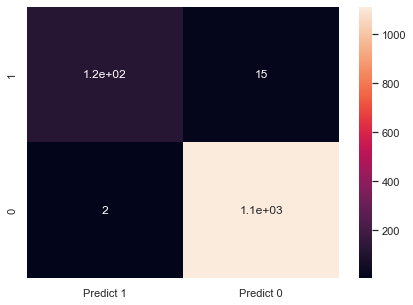

In [120]:
# Confusion Matrix for Testing Data Predictions for our Hyperparameter tuned SVM model

svm_hyper_cm=metrics.confusion_matrix(Y_test, Y_predict_test, labels=[1, 0])

df_svm_hyper_cm = pd.DataFrame(svm_hyper_cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_svm_hyper_cm, annot=True)

In [121]:
# Classification Report of Performance metrics for Hyperparameter tuned SVM model on Testing data
print(classification_report(Y_test,Y_predict_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1116
           1       0.98      0.89      0.93       134

    accuracy                           0.99      1250
   macro avg       0.99      0.94      0.96      1250
weighted avg       0.99      0.99      0.99      1250



In [122]:
# Classification Report of Performance metrics for Hyperparameter tuned SVM model on Training data
print(classification_report(Y_train,Y_predict_train))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3404
           1       0.98      0.91      0.95       346

    accuracy                           0.99      3750
   macro avg       0.99      0.95      0.97      3750
weighted avg       0.99      0.99      0.99      3750



<AxesSubplot:>

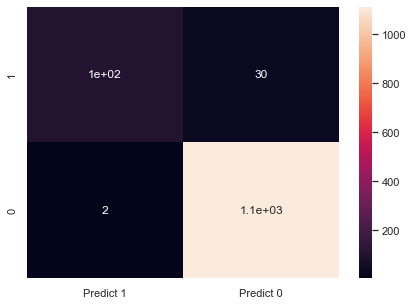

In [123]:
# 4.D

# BASE MODEL EVALUATION METRICS

Y_predict_test = svc_base.predict(Xs_test)
Y_predict_train = svc_base.predict(Xs_train)

# Confusion Matrix for Testing Data Predictions for our Hyperparameter tuned SVM model

svm_base_cm=metrics.confusion_matrix(Y_test, Y_predict_test, labels=[1, 0])

df_svm_base_cm = pd.DataFrame(svm_base_cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_svm_base_cm, annot=True)

In [124]:
# Classification Report of Performance metrics for Base SVM model on Testing data
print(classification_report(Y_test,Y_predict_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1116
           1       0.98      0.78      0.87       134

    accuracy                           0.97      1250
   macro avg       0.98      0.89      0.93      1250
weighted avg       0.97      0.97      0.97      1250



In [125]:
# Classification Report of Performance metrics for Base SVM model on Training data
print(classification_report(Y_train,Y_predict_train))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3404
           1       0.99      0.79      0.87       346

    accuracy                           0.98      3750
   macro avg       0.98      0.89      0.93      3750
weighted avg       0.98      0.98      0.98      3750

